Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

Loading the dataset 

In [3]:
df = pd.read_csv('./UCI_Credit_Card.csv')

Check the missing values in the dataset

In [4]:
print(df.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


Convert categorical variables (SEX, EDUCATION, MARRIAGE) to categorical type


In [5]:
df['SEX'] = df['SEX'].astype('category')
df['EDUCATION'] = df['EDUCATION'].astype('category')
df['MARRIAGE'] = df['MARRIAGE'].astype('category')


Rename columns for better readability


In [6]:
df.columns

Index(['Id', 'LimitBalance', 'Sex', 'Education', 'Marriage', 'Age', 'Pay0',
       'Pay2', 'Pay3', 'Pay4', 'Pay5', 'Pay6', 'BillAmt1', 'BillAmt2',
       'BillAmt3', 'BillAmt4', 'BillAmt5', 'BillAmt6', 'PayAmt1', 'PayAmt2',
       'PayAmt3', 'PayAmt4', 'PayAmt5', 'PayAmt6', 'Default'],
      dtype='object')

In [6]:
df.columns = ['Id', 'LimitBalance', 'Sex', 'Education', 'Marriage', 'Age', 'Pay0', 'Pay2', 'Pay3', 'Pay4', 'Pay5', 'Pay6', 
              'BillAmt1', 'BillAmt2', 'BillAmt3', 'BillAmt4', 'BillAmt5', 'BillAmt6', 
              'PayAmt1', 'PayAmt2', 'PayAmt3', 'PayAmt4', 'PayAmt5', 'PayAmt6', 'Default']

In [7]:
df.shape

(30000, 25)

In [8]:
df.info

<bound method DataFrame.info of           Id  LimitBalance Sex Education Marriage  Age  Pay0  Pay2  Pay3  \
0          1       20000.0   2         2        1   24     2     2    -1   
1          2      120000.0   2         2        2   26    -1     2     0   
2          3       90000.0   2         2        2   34     0     0     0   
3          4       50000.0   2         2        1   37     0     0     0   
4          5       50000.0   1         2        1   57    -1     0    -1   
...      ...           ...  ..       ...      ...  ...   ...   ...   ...   
29995  29996      220000.0   1         3        1   39     0     0     0   
29996  29997      150000.0   1         3        2   43    -1    -1    -1   
29997  29998       30000.0   1         2        2   37     4     3     2   
29998  29999       80000.0   1         3        1   41     1    -1     0   
29999  30000       50000.0   1         2        1   46     0     0     0   

       Pay4  ...  BillAmt4  BillAmt5  BillAmt6  PayAmt1

In [9]:
df.describe

<bound method NDFrame.describe of           Id  LimitBalance Sex Education Marriage  Age  Pay0  Pay2  Pay3  \
0          1       20000.0   2         2        1   24     2     2    -1   
1          2      120000.0   2         2        2   26    -1     2     0   
2          3       90000.0   2         2        2   34     0     0     0   
3          4       50000.0   2         2        1   37     0     0     0   
4          5       50000.0   1         2        1   57    -1     0    -1   
...      ...           ...  ..       ...      ...  ...   ...   ...   ...   
29995  29996      220000.0   1         3        1   39     0     0     0   
29996  29997      150000.0   1         3        2   43    -1    -1    -1   
29997  29998       30000.0   1         2        2   37     4     3     2   
29998  29999       80000.0   1         3        1   41     1    -1     0   
29999  30000       50000.0   1         2        1   46     0     0     0   

       Pay4  ...  BillAmt4  BillAmt5  BillAmt6  PayAm

Standarize numerical features

In [7]:
scaler = StandardScaler()
df[['LimitBalance', 'Age', 'BillAmt1', 'BillAmt2', 'BillAmt3', 'BillAmt4', 'BillAmt5', 'BillAmt6', 
    'PayAmt1', 'PayAmt2', 'PayAmt3', 'PayAmt4', 'PayAmt5', 'PayAmt6']] = scaler.fit_transform(df[['LimitBalance', 'Age', 'BillAmt1', 'BillAmt2', 'BillAmt3', 'BillAmt4', 'BillAmt5', 'BillAmt6', 
                                                                                                     'PayAmt1', 'PayAmt2', 'PayAmt3', 'PayAmt4', 'PayAmt5', 'PayAmt6']])

Split data into training and test sets

In [8]:
X = df.drop('Default', axis=1)
y = df['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Exploratory Data Analysis 

In [28]:
# Pairplot for visualization
sns.pairplot(df, hue='Default')
plt.show()


KeyboardInterrupt: 

Predictive Modeling Random Forest 

In [8]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.815
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.63      0.36      0.46      1960

    accuracy                           0.81      9000
   macro avg       0.74      0.65      0.67      9000
weighted avg       0.80      0.81      0.79      9000



Predictive model_ Descision tree

In [9]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7231111111111111
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7040
           1       0.37      0.40      0.39      1960

    accuracy                           0.72      9000
   macro avg       0.60      0.61      0.60      9000
weighted avg       0.73      0.72      0.73      9000



Predictive Model_Logistic Regression

In [10]:

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8052222222222222
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7040
           1       0.65      0.23      0.34      1960

    accuracy                           0.81      9000
   macro avg       0.74      0.60      0.61      9000
weighted avg       0.78      0.81      0.77      9000



/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Visualisation of Model performance

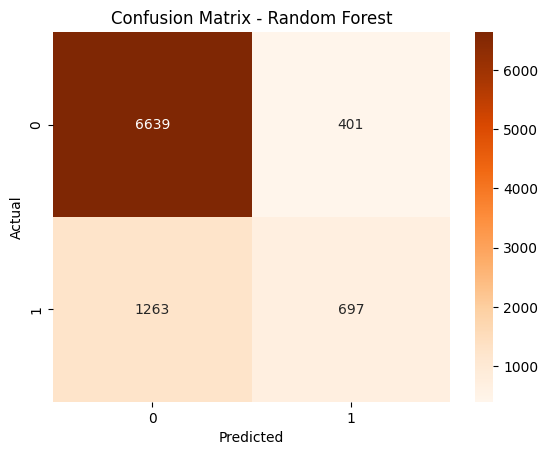

In [16]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

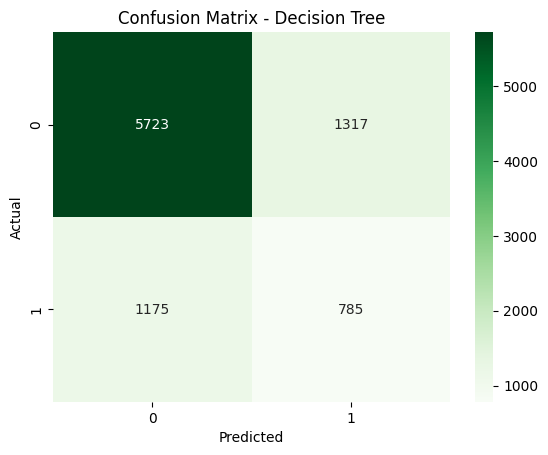

In [17]:
# Confusion Matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

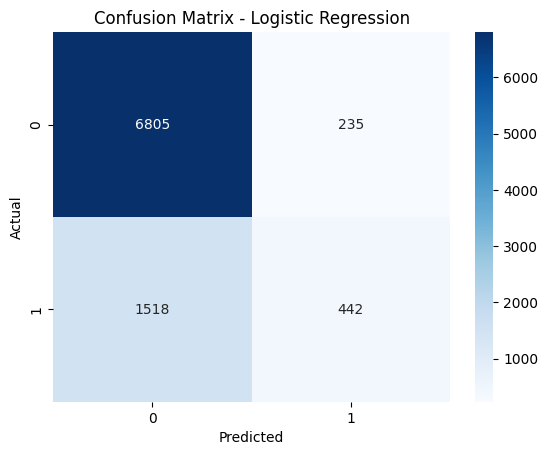

In [18]:
# Confusion Matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Visualisations

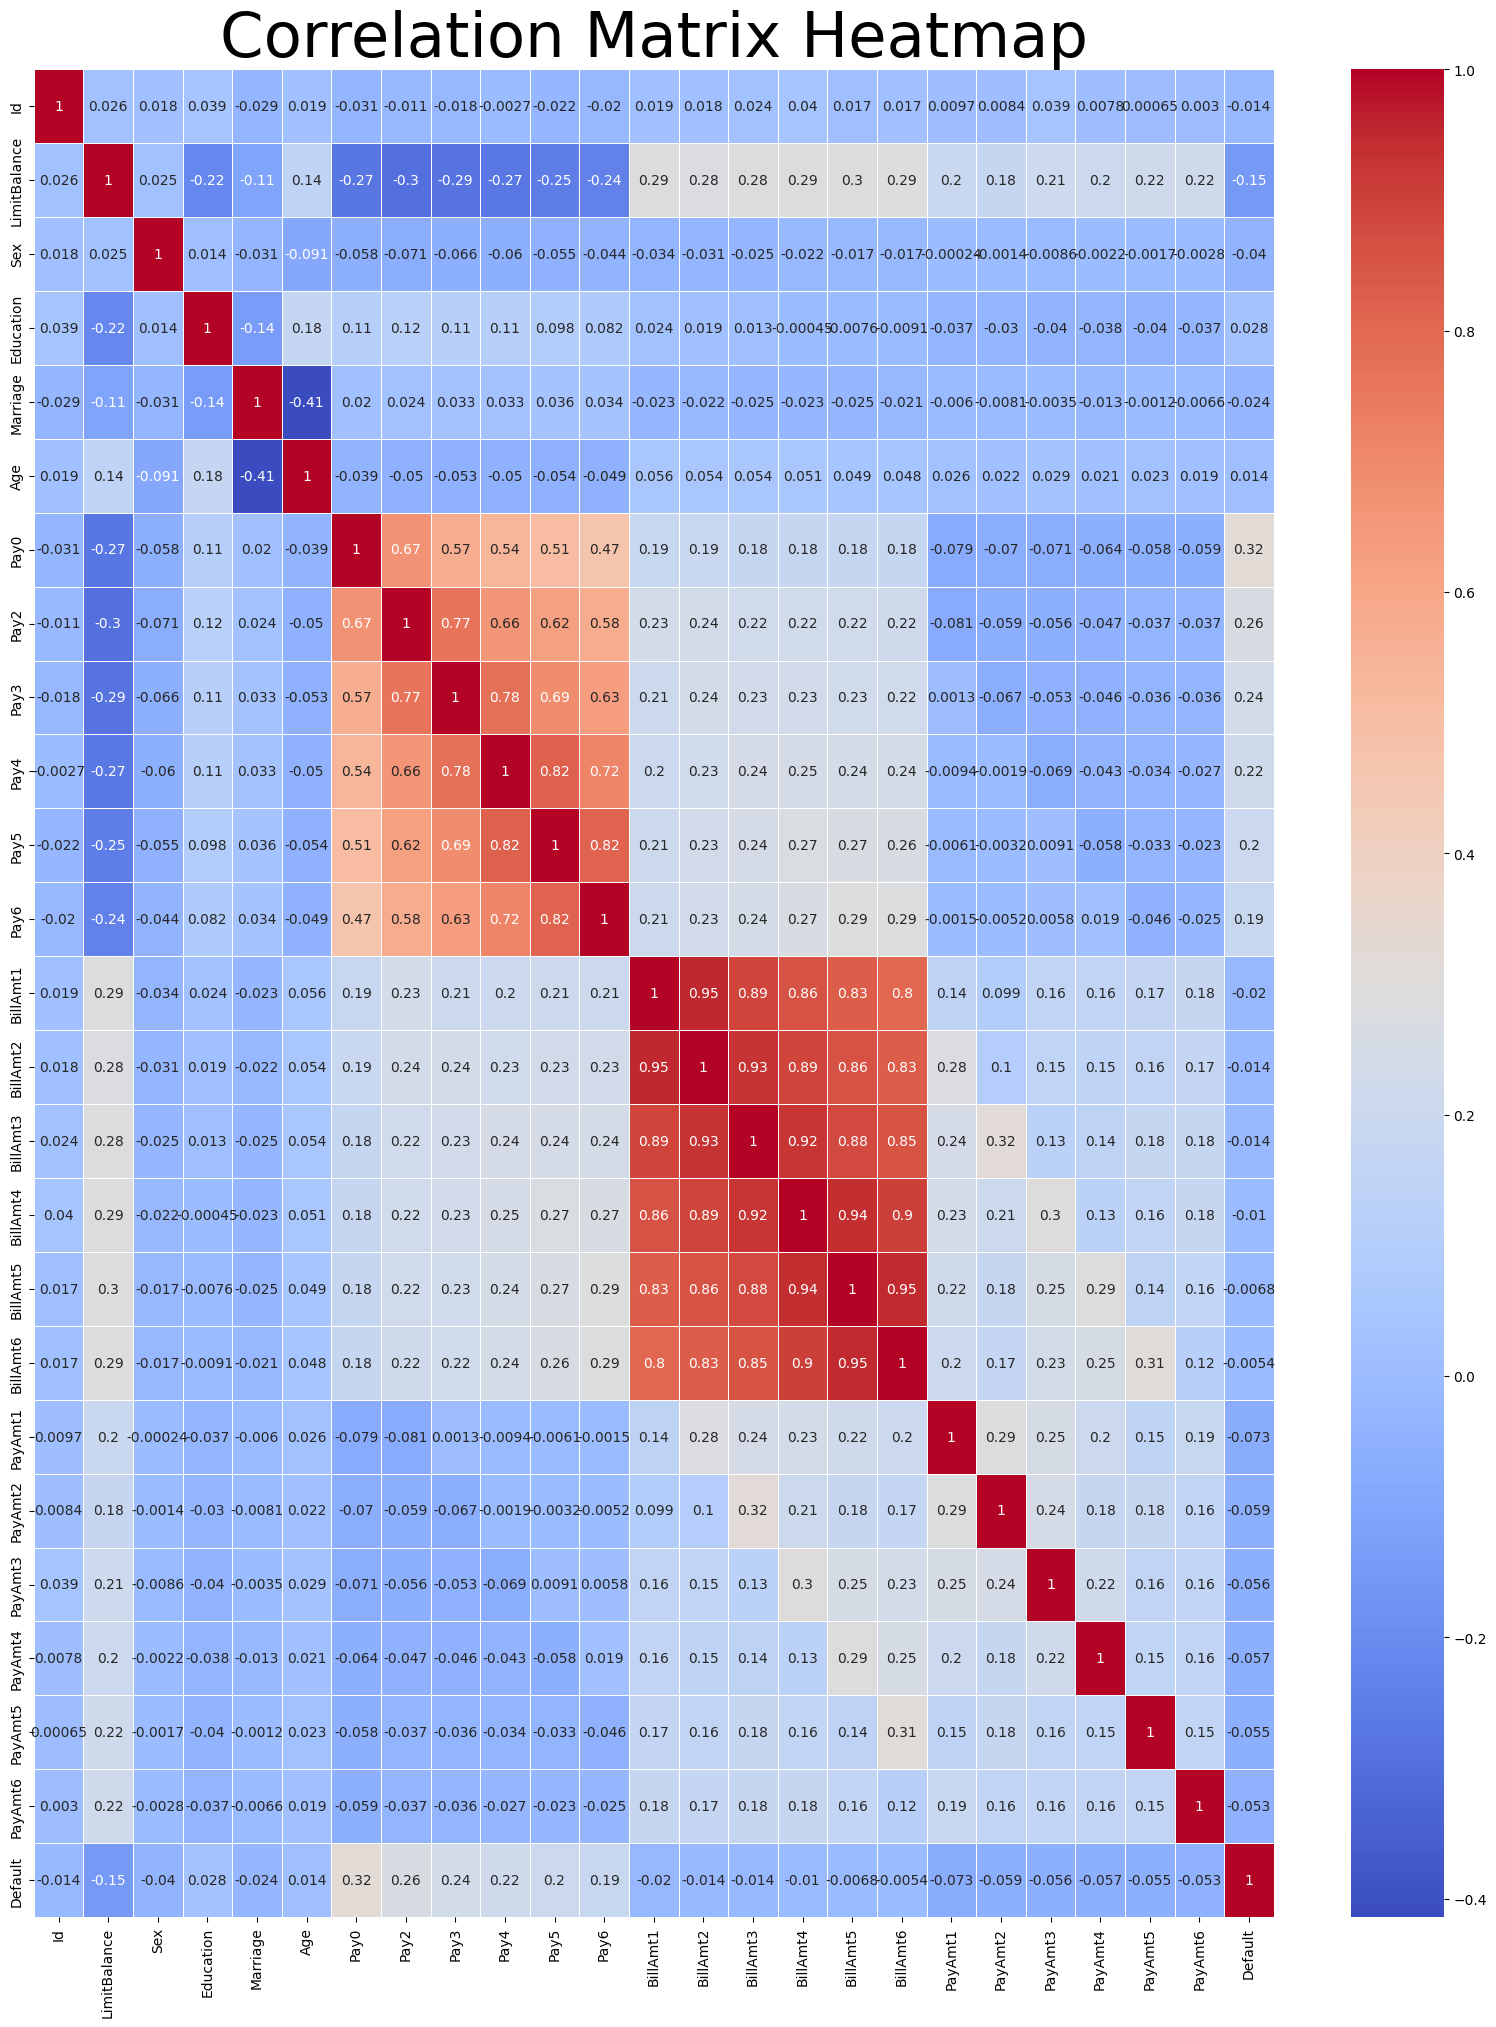

In [26]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 24))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=45)
plt.show()

Scatter plot

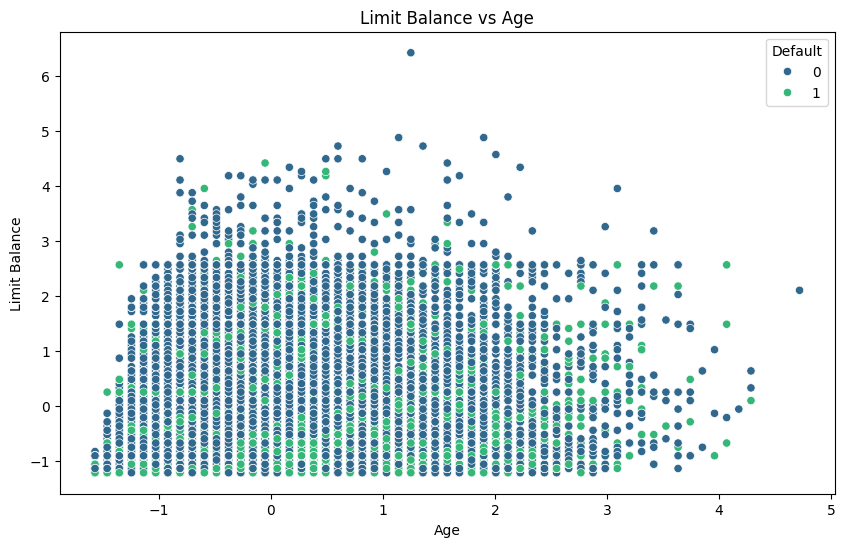

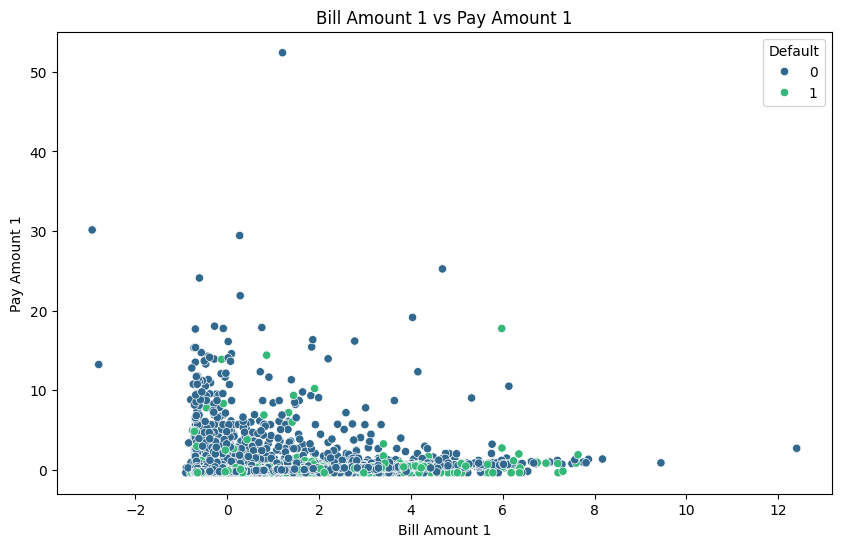

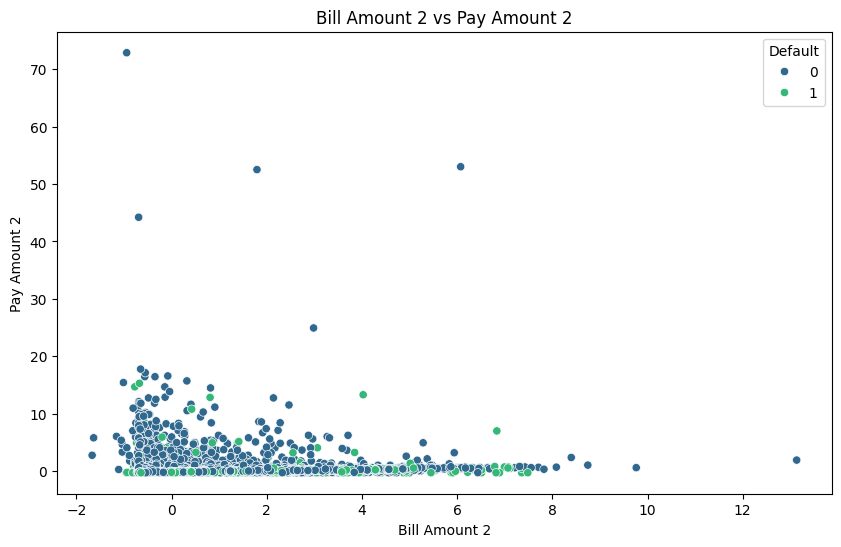

In [27]:
# Scatter plot for LimitBalance vs Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='LimitBalance', hue='Default', data=df, palette='viridis')
plt.title('Limit Balance vs Age')
plt.xlabel('Age')
plt.ylabel('Limit Balance')
plt.show()

# Scatter plot for BillAmt1 vs PayAmt1
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BillAmt1', y='PayAmt1', hue='Default', data=df, palette='viridis')
plt.title('Bill Amount 1 vs Pay Amount 1')
plt.xlabel('Bill Amount 1')
plt.ylabel('Pay Amount 1')
plt.show()

# Scatter plot for BillAmt2 vs PayAmt2
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BillAmt2', y='PayAmt2', hue='Default', data=df, palette='viridis')
plt.title('Bill Amount 2 vs Pay Amount 2')
plt.xlabel('Bill Amount 2')
plt.ylabel('Pay Amount 2')
plt.show()